In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [75]:
traindf = pd.read_csv('D:\\Documents\\WU\\R Projects\\MNIST\\train.csv')
testdf = pd.read_csv('D:\\Documents\\WU\\R Projects\\MNIST\\test.csv')
traindf.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X, y = traindf[traindf.columns[1:]], traindf['label']

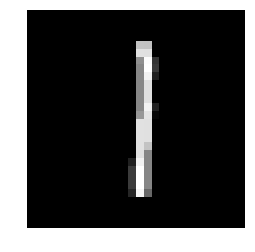

In [5]:
#Plot a digit
sample_digit = X.loc[2700,]
sample_digit = np.array(sample_digit)
sample_digit = sample_digit.reshape(28,28)
plt.imshow(sample_digit, cmap = 'gray',
           interpolation="nearest")
plt.axis('off')
plt.show()

In [6]:
#It looks like a 1 and is actually 1
y[2700]

1

In [7]:
#Split the dataset to train and test samples:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
#Try to fit first only for ones and non-ones with SGD classifier.

y_train_1 = (y_train == 1)  # True for all 5s, False for all other digits.
y_test_1 = (y_test == 1)

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=1)
sgd_clf.fit(X_train, y_train_1)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=1, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [9]:
#Great, the method worked at least for this observation.
sgd_clf.predict([X.loc[2700,]])

array([ True])

In [10]:
#Let's now measure the correctness overall:
#Almost 99% correctness for the model, but this means around 80% accuracy about the ones only, because around 10%
#of the digits are actually ones and if we always predict FALSE, then we would receive ~90% accuracy

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_test, y_test_1, cv=3, scoring="accuracy")

array([0.98809781, 0.98917749, 0.99155661])

In [11]:
#Create a Confusion Matrix for better sense of the data:

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_test_pred = cross_val_predict(sgd_clf, X_test, y_test_1, cv=3)
confusion_matrix(y_test_1, y_test_pred)

#71 False Positives and 73 False Negatives

array([[12269,    71],
       [   73,  1447]], dtype=int64)

In [12]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test_1, y_test_pred)
#95% Precision - The TP rate is good compared to the FP (how many of the actual non-ones we have predicted as 1s)

0.953227931488801

In [13]:
recall_score(y_test_1, y_test_pred)
#95% Recall - The TP rate is good compared to the FN (how many of the actual ones we have missed 
#and classified as non-ones)

0.9519736842105263

In [14]:
from sklearn.metrics import f1_score
f1_score(y_test_1, y_test_pred)

0.9526003949967082

In [28]:
##Multiclass prediction:
sgd_clf.fit(X_train, y_train)
y_test_multi1 = cross_val_predict(sgd_clf, X_test, y_test, cv=3)
confusion_matrix(y_test, y_test_multi1)

array([[1294,    0,    5,    1,    2,    7,   10,    1,   11,    2],
       [   0, 1395,   33,   16,    0,    5,    9,   10,   45,    7],
       [  22,   12, 1179,   31,   19,    8,   40,   17,   75,   11],
       [  23,    3,   61, 1210,    4,   75,   19,    9,   47,   20],
       [   2,    4,    9,    4, 1141,    9,   27,    5,   38,  119],
       [  26,    2,   11,   75,   16,  909,   49,    4,   93,   20],
       [  16,    2,   10,    0,    4,   11, 1339,    2,   13,    0],
       [  21,    9,   25,   38,   18,   17,    2, 1123,   56,  171],
       [  28,   34,   32,   40,   14,  117,   25,    4,  981,   59],
       [  16,    3,    6,   23,   40,   27,    2,   31,   80, 1120]],
      dtype=int64)

In [26]:
some_digit_scores = sgd_clf.decision_function([X.loc[2700]])
some_digit_scores
#Highest score is for 1 => the model predicts accurately for this prediction.

array([[-1090159.77389666,   284338.59191912,  -361807.83947008,
         -215869.38261712,  -345576.79526109,  -457668.97883775,
         -103575.41739337,  -167359.5732529 ,  -257230.21370422,
         -228461.18462673]])

In [30]:
#SGD F1 score
f1_score(y_test, y_test_multi1,average='micro')

0.8435064935064934

In [47]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=1)
forest_clf.fit(X_train, y_train)
forest_clf.predict(X.loc[2700].values.reshape(1,-1))
#Again the RF model guessed right the value of the digit I am checking

array([1], dtype=int64)

In [54]:
forest_clf.predict_proba(X.loc[2700].values.reshape(1,-1))
#Actually it is 100% certain about it

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [57]:
#RF correctness
cross_val_score(forest_clf, X_test, y_test, cv=3, scoring="accuracy")

array([0.90681081, 0.91255411, 0.90812568])

In [58]:
#RF F1 score
y_test_multi2 = cross_val_predict(forest_clf, X_test, y_test, cv=3)
f1_score(y_test, y_test_multi2,average='micro')

0.9091630591630592

In [60]:
#So after all, RF seems the better method to predict the numbers, we care only about the f1 score, not about high 
#precision, or high recall only, because if a digit is missed, then it will be classified into some other
#class, which will mean bad results again.

In [103]:
first_pred[0]

2

In [101]:
first_pred_df = pd.DataFrame(first_pred)
first_pred_df.to_csv(path_or_buf='D:\\Documents\\WU\\R Projects\\MNIST\\first_pred.csv')